In [122]:
import PIL
import cv2
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

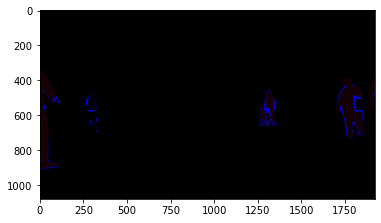

In [2]:
path = "./"
img = cv2.imread(path+"MasksRaw/000001.png")
plt.imshow(img)

In [3]:
import glob

img_dict = {}
for filename in glob.glob("./MasksRaw/*"):
    img = cv2.imread(filename)
    img_dict[filename[-10:]]=img

525


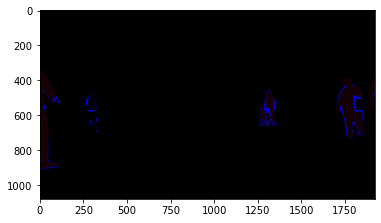

In [4]:
print(len(img_dict))
plt.imshow(img_dict["000001.png"])

In [52]:
def get_pixel_values(img):
    (h, w, c) = img.shape
    uniques = np.unique(img.reshape(w*h, c),axis=0)
    return uniques

def get_unique_ids(img):
    (h, w, c) = img.shape
    uniques = np.unique(img.reshape(w*h, c),axis=0)
    out = []
    for u in uniques:
        if np.array_equal(u[1:],[0,4]) and u[0] != 0:
            out.append(u)
    return out

uni_pixels = get_pixel_values(img_dict["000001.png"])
for p in uni_pixels:
    print(p)
print('---')
uni_id_0 = get_unique_ids(img_dict["000001.png"])
for u in uni_id_0:
    print(u)

[0 0 0]
[0 0 1]
[0 0 4]
[  0   0 255]
[2 0 4]
[20  0  4]
[21  0  4]
[22  0  4]
[23  0  4]
[24  0  4]
---
[2 0 4]
[20  0  4]
[21  0  4]
[22  0  4]
[23  0  4]
[24  0  4]


In [16]:
# clean up masks (preprocessing)
path = "./Masks/"
keys = list(img_dict.keys())
for key in keys:
    img = img_dict[key]
    uni_ids = get_unique_ids(img)
    

KeyboardInterrupt: 

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


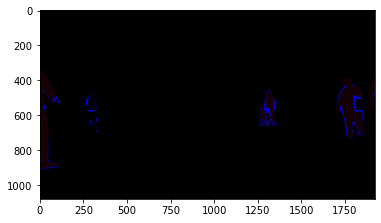

In [25]:
ii = img_dict['000001.png'].copy()
plt.imshow(ii)

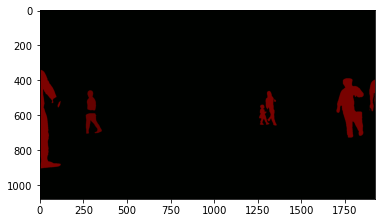

In [59]:
ii = img_dict['000001.png'].copy()
ii = np.where(ii==(2,0,4),[2,0,4],[255,0,0])
#plt.imshow(ii)

img_pro = img_dict['000001.png'].copy()
pixels = get_pixel_values(img_pro)
for p in pixels:
    if np.array_equal(p[1:], [0,4]) and p[0] != 0:
        img_pro = np.where(img_pro==p, [p[0],p[0],p[0]],img_pro)
    else:
        img_pro = np.where(img_pro==p, [0,0,0],img_pro)
plt.imshow(img_pro)

In [142]:
def transform_mask(key):
    img = img_dict[key].copy()
    pixels = get_pixel_values(img)
    for p in pixels:
        #print(p)
        if np.array_equal(p[1:], [0,4]) and p[0] != 0:
            img = np.where((img==p).all(axis=-1)[...,None], [p[0],p[0],p[0]],img)
        else:
            img = np.where((img==p).all(axis=-1)[...,None], [0,0,0],img)
    cv2.imwrite('./Masks/'+key,img)

In [144]:
for k in keys:
    print(k)
    transform_mask(k)

000001.png
000002.png
000003.png
000004.png
000005.png
000006.png
000007.png
000008.png
000009.png
000010.png
000011.png
000012.png
000013.png
000014.png
000015.png
000016.png
000017.png
000018.png
000019.png
000020.png
000021.png
000022.png
000023.png
000024.png
000025.png
000026.png
000027.png
000028.png
000029.png
000030.png
000031.png
000032.png
000033.png
000034.png
000035.png
000036.png
000037.png
000038.png
000039.png
000040.png
000041.png
000042.png
000043.png
000044.png
000045.png
000046.png
000047.png
000048.png
000049.png
000050.png
000051.png
000052.png
000053.png
000054.png
000055.png
000056.png
000057.png
000058.png
000059.png
000060.png
000061.png
000062.png
000063.png
000064.png
000065.png
000066.png
000067.png
000068.png
000069.png
000070.png
000071.png
000072.png
000073.png
000074.png
000075.png
000076.png
000077.png
000078.png
000079.png
000080.png
000081.png
000082.png
000083.png
000084.png
000085.png
000086.png
000087.png
000088.png
000089.png
000090.png
000091.png